Task 1
Data Science & Business Analytics Internship

. To Predict the percentage of marks of an student based on the number of study hours in a day


Name - ANKUR GUGLANI   
Gmail -ma20m001@smail.iitm.ac.in

Prediction using Supervised ML 

. Predict the marks of a students expected to score based upon the number of hours they studied.

. To predict the score of a student who studies for 9.25 hrs/ day 



THE SPARKS FOUNDATION

In [29]:
#Importing important libraries as required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Importing the file

In [31]:
##importing the data given by grip program
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("data is loaded")
df

data is loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


UNDERSTANDING DATA


In [32]:
df.columns


Index(['Hours', 'Scores'], dtype='object')

In [33]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [35]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [37]:
df.shape

(25, 2)

In [38]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [39]:
print("total number of null values = ",df.isnull().sum().sum())

total number of null values =  0


ANALYSIS BY DATA VISUALIZATION

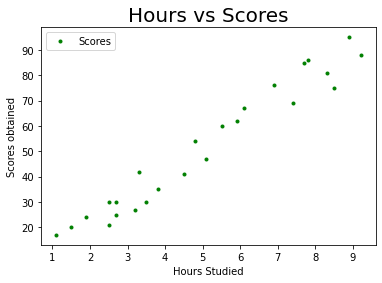

In [40]:
df.plot(x='Hours', y='Scores', style='.',color='green')  
plt.title('Hours vs Scores',fontsize=20)  
plt.xlabel('Hours Studied',)  
plt.ylabel('Scores obtained')  
plt.show()

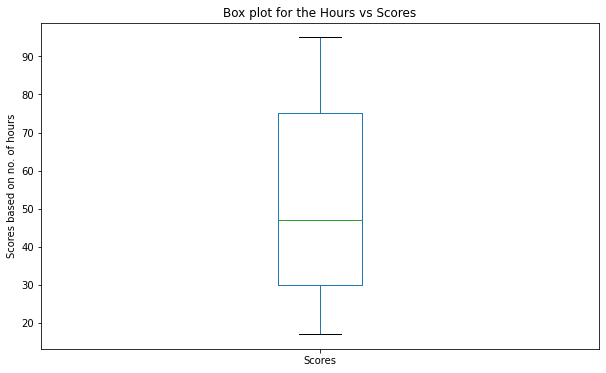

In [41]:
df_scores = df['Scores']
df_scores.plot(kind='box', figsize=(10, 6))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

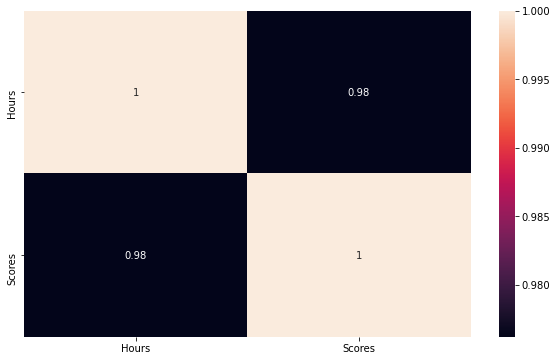

In [42]:
corre=df.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data=corre,annot=True)

Using Simple linear regression 




Split data into two dataset testing and training dataset


In [43]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

Training the algorithm

In [45]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training of model")

Training of model


In [46]:
print("intercept =",regressor.intercept_,"\nslope =",regressor.coef_)

intercept = 2.018160041434662 
slope = [9.91065648]


In [47]:
Y0 = regressor.intercept_ + regressor.coef_*X_train

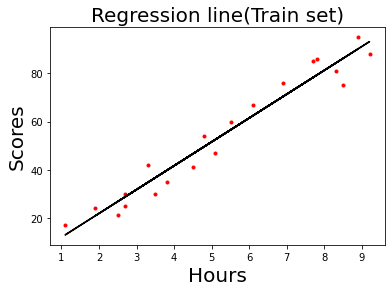

In [48]:
plt.scatter(X_train,y_train,color='red',marker='.')
plt.plot(X_train,Y0,color='black')
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.title("Regression line(Train set)",fontsize=20)
plt.show()

In [49]:
print("Accuracy of Training learning rate -",regressor.score(X_train, y_train)*100)
print("Accuracy of Testing learning rate - ",regressor.score(X_test, y_test)*100)

Accuracy of Training learning rate - 95.15510725211553
Accuracy of Testing learning rate -  94.54906892105353


MAKING PREDICTIONS

In [50]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
slope = num/den

In [51]:
intercept = mean_y - slope*mean_x

In [52]:
df['predicted_Scores'] = intercept + slope*df['Hours']

In [53]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

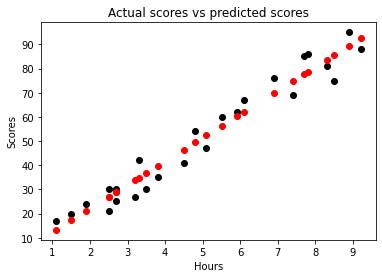

In [54]:
plt.scatter(df['Hours'], df['Scores'], c='black', label='Aactual Marks')
plt.scatter(df['Hours'], df['predicted_Scores'], c='red', label='Predected Marks')
plt.title('Actual scores vs predicted scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot()

PREDICTING THE SCORE

In [55]:
Prediction_score = regressor.predict([[9.25]])
print("predicted score for a student studying 9.25 hours per day is :",Prediction_score)

predicted score for a student studying 9.25 hours per day is : [93.69173249]


Conclusion
From the above result if studied for 9.25 hours in a day then student will secured 93.69 MARKS
Task-1 completed grip sparks foundation